In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

First im going to do some image augmentations in order to increase our dataset samples then apply the image_resizer function

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# In progress ..........................................

In [37]:
# # Defining Global Variables
# image_size = 150
# def_labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
# root = 'C:\\Users\\98939\\Desktop\\BC_Project\\Data'

# def train_data_augmentation():
    
#     """Defining Image augmenter"""
#     train_datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         horizontal_flip=True,
#         fill_mode='nearest',
#         zca_whitening=True,
#         featurewise_center=True,
#         featurewise_std_normalization=True
#         )

    
#     """Now we are going to iterate over each label and augment the corresponding images and save them in the different dir"""
#     for i in def_labels:
#         folderPath = os.path.join(root,'Training',i)
#         for j in tqdm(os.listdir(folderPath)):
#             train_generator = train_datagen.flow_from_directory(
#                 'C:\\Users\\98939\\Desktop\\BC_Project\\Data\\Training',
#                 target_size=(150,150),
#                 batch_size=32,
#                 shuffle=True,
#                 class_mode='categorical')
# #                 save_to_dir=folderPath,
# #                 save_format="png")
            
#     return train_generator
            

In [38]:
# def test_data_augmentation():        
#     """Defining Image augmenter"""
#     validation_datagen = ImageDataGenerator()
    
#     """Now we are going to iterate over each label and augment the corresponding images and save them in the different dir"""    
#     for i in def_labels:
#         folderPath = os.path.join(root,'Testing',i)
#         for j in tqdm(os.listdir(folderPath)):   
#             validation_generator = validation_datagen.flow_from_directory(
#                 'C:\\Users\\98939\\Desktop\\BC_Project\\Data\\Testing',
#                 target_size=(150,150),
#                 batch_size=32,
# #                 save_to_dir='C:\\Users\\98939\\Desktop\\BC_Project\\Data\\AugmentedTestFiles',
# #                 save_format="png",
#                 shuffle=True,
#                 class_mode='categorical')
    
#     return validation_generator

# ...............................................................

# Defining a function to create CNN model

In [50]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [51]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [52]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [45]:
#  train_generator = train_data_augmentation()

  0%|▏                                                                                 | 2/826 [00:00<01:17, 10.68it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  1%|▌                                                                                 | 6/826 [00:00<01:17, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  1%|▊                                                                                 | 8/826 [00:00<01:17, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  1%|█▏                                                                               | 12/826 [00:01<01:17, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▎                                                                               | 14/826 [00:01<01:17, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▊                                                                               | 18/826 [00:01<01:16, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▉                                                                               | 20/826 [00:01<01:16, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  3%|██▎                                                                              | 24/826 [00:02<01:16, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  3%|██▌                                                                              | 26/826 [00:02<01:15, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|██▉                                                                              | 30/826 [00:02<01:15, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|███▏                                                                             | 32/826 [00:03<01:14, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|███▌                                                                             | 36/826 [00:03<01:14, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|███▋                                                                             | 38/826 [00:03<01:14, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|████                                                                             | 42/826 [00:03<01:13, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|████▎                                                                            | 44/826 [00:04<01:13, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  6%|████▌                                                                            | 46/826 [00:04<01:13, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  6%|████▉                                                                            | 50/826 [00:04<01:13, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▎                                                                           | 54/826 [00:05<01:13, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▍                                                                           | 56/826 [00:05<01:13, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▉                                                                           | 60/826 [00:05<01:12, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████                                                                           | 62/826 [00:05<01:12, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████▍                                                                          | 66/826 [00:06<01:11, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████▋                                                                          | 68/826 [00:06<01:11, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████                                                                          | 72/826 [00:06<01:11, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████▎                                                                         | 74/826 [00:07<01:11, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████▋                                                                         | 78/826 [00:07<01:10, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|███████▊                                                                         | 80/826 [00:07<01:10, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|████████▏                                                                        | 84/826 [00:07<01:10, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|████████▍                                                                        | 86/826 [00:08<01:10, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 11%|████████▊                                                                        | 90/826 [00:08<01:09, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 11%|█████████                                                                        | 92/826 [00:08<01:09, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▍                                                                       | 96/826 [00:09<01:09, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▌                                                                       | 98/826 [00:09<01:08, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▉                                                                      | 102/826 [00:09<01:08, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████                                                                      | 104/826 [00:09<01:08, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████▍                                                                     | 108/826 [00:10<01:08, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████▋                                                                     | 110/826 [00:10<01:07, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|███████████                                                                     | 114/826 [00:10<01:08, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|███████████▏                                                                    | 116/826 [00:11<01:08, 10.32it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|███████████▍                                                                    | 118/826 [00:11<01:08, 10.31it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|███████████▊                                                                    | 122/826 [00:11<01:08, 10.35it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|████████████                                                                    | 124/826 [00:11<01:08, 10.32it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|████████████▍                                                                   | 128/826 [00:12<01:06, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|████████████▌                                                                   | 130/826 [00:12<01:06, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|████████████▊                                                                   | 132/826 [00:12<01:07, 10.26it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|█████████████▏                                                                  | 136/826 [00:12<01:06, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▎                                                                  | 138/826 [00:13<01:06, 10.30it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▊                                                                  | 142/826 [00:13<01:06, 10.33it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▉                                                                  | 144/826 [00:13<01:06, 10.33it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▎                                                                 | 148/826 [00:14<01:04, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▌                                                                 | 150/826 [00:14<01:03, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|██████████████▉                                                                 | 154/826 [00:14<01:03, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|███████████████                                                                 | 156/826 [00:14<01:03, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|███████████████▍                                                                | 160/826 [00:15<01:03, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|███████████████▋                                                                | 162/826 [00:15<01:03, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|████████████████                                                                | 166/826 [00:15<01:03, 10.31it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|████████████████▎                                                               | 168/826 [00:16<01:03, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|████████████████▋                                                               | 172/826 [00:16<01:02, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|████████████████▊                                                               | 174/826 [00:16<01:02, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▏                                                              | 178/826 [00:16<01:01, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▍                                                              | 180/826 [00:17<01:01, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▊                                                              | 184/826 [00:17<01:01, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████                                                              | 186/826 [00:17<01:01, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▍                                                             | 190/826 [00:18<01:00, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▌                                                             | 192/826 [00:18<01:00, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▊                                                             | 194/826 [00:18<01:00, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|██████████████████▉                                                             | 196/826 [00:18<01:00, 10.36it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|███████████████████▎                                                            | 200/826 [00:19<00:59, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|███████████████████▊                                                            | 204/826 [00:19<00:59, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|███████████████████▉                                                            | 206/826 [00:19<00:59, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|████████████████████▎                                                           | 210/826 [00:20<00:58, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|████████████████████▌                                                           | 212/826 [00:20<00:58, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|████████████████████▉                                                           | 216/826 [00:20<00:57, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|█████████████████████                                                           | 218/826 [00:20<00:57, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▌                                                          | 222/826 [00:21<00:58, 10.41it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▋                                                          | 224/826 [00:21<00:57, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▉                                                          | 226/826 [00:21<00:57, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████                                                          | 228/826 [00:21<00:59, 10.11it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████▎                                                         | 230/826 [00:21<01:01,  9.75it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████▋                                                         | 234/826 [00:22<00:58, 10.14it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|███████████████████████                                                         | 238/826 [00:22<00:56, 10.36it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|███████████████████████▏                                                        | 240/826 [00:22<00:56, 10.36it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|███████████████████████▋                                                        | 244/826 [00:23<00:55, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|███████████████████████▊                                                        | 246/826 [00:23<00:55, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|████████████████████████                                                        | 248/826 [00:23<00:54, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|████████████████████████▍                                                       | 252/826 [00:24<00:54, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|████████████████████████▌                                                       | 254/826 [00:24<00:54, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|████████████████████████▉                                                       | 258/826 [00:24<00:54, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▍                                                      | 262/826 [00:25<00:53, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▌                                                      | 264/826 [00:25<00:53, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▊                                                      | 266/826 [00:25<00:53, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████▏                                                     | 270/826 [00:25<00:52, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████▌                                                     | 274/826 [00:26<00:52, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████▋                                                     | 276/826 [00:26<00:52, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|███████████████████████████                                                     | 280/826 [00:26<00:52, 10.41it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|███████████████████████████▎                                                    | 282/826 [00:26<00:52, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|███████████████████████████▋                                                    | 286/826 [00:27<00:51, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|███████████████████████████▉                                                    | 288/826 [00:27<00:51, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|████████████████████████████▎                                                   | 292/826 [00:27<00:50, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|████████████████████████████▍                                                   | 294/826 [00:28<00:51, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|████████████████████████████▊                                                   | 298/826 [00:28<00:50, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|█████████████████████████████                                                   | 300/826 [00:28<00:50, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▏                                                  | 302/826 [00:28<00:51, 10.22it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▋                                                  | 306/826 [00:29<00:50, 10.33it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▊                                                  | 308/826 [00:29<00:49, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████                                                  | 310/826 [00:29<00:49, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▍                                                 | 314/826 [00:30<00:48, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▊                                                 | 318/826 [00:30<00:48, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|██████████████████████████████▉                                                 | 320/826 [00:30<00:48, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|███████████████████████████████▍                                                | 324/826 [00:30<00:48, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|███████████████████████████████▌                                                | 326/826 [00:31<00:47, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 40%|███████████████████████████████▊                                                | 328/826 [00:31<00:47, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 40%|████████████████████████████████▏                                               | 332/826 [00:31<00:46, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|████████████████████████████████▌                                               | 336/826 [00:32<00:46, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|████████████████████████████████▋                                               | 338/826 [00:32<00:46, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|█████████████████████████████████                                               | 342/826 [00:32<00:46, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▎                                              | 344/826 [00:32<00:45, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▋                                              | 348/826 [00:33<00:45, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▉                                              | 350/826 [00:33<00:45, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 43%|██████████████████████████████████                                              | 352/826 [00:33<00:44, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 43%|██████████████████████████████████▍                                             | 356/826 [00:33<00:44, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|██████████████████████████████████▊                                             | 360/826 [00:34<00:44, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|███████████████████████████████████                                             | 362/826 [00:34<00:44, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|███████████████████████████████████▍                                            | 366/826 [00:34<00:43, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|███████████████████████████████████▋                                            | 368/826 [00:35<00:43, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|███████████████████████████████████▊                                            | 370/826 [00:35<00:43, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|████████████████████████████████████▏                                           | 374/826 [00:35<00:43, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|████████████████████████████████████▌                                           | 378/826 [00:36<00:42, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|████████████████████████████████████▊                                           | 380/826 [00:36<00:42, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|█████████████████████████████████████▏                                          | 384/826 [00:36<00:41, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▍                                          | 386/826 [00:36<00:41, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▊                                          | 390/826 [00:37<00:41, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▉                                          | 392/826 [00:37<00:41, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 48%|██████████████████████████████████████▎                                         | 396/826 [00:37<00:40, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 48%|██████████████████████████████████████▌                                         | 398/826 [00:37<00:40, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|██████████████████████████████████████▉                                         | 402/826 [00:38<00:40, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|███████████████████████████████████████▏                                        | 404/826 [00:38<00:39, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|███████████████████████████████████████▌                                        | 408/826 [00:38<00:39, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|███████████████████████████████████████▋                                        | 410/826 [00:39<00:39, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|████████████████████████████████████████                                        | 414/826 [00:39<00:39, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|████████████████████████████████████████▎                                       | 416/826 [00:39<00:39, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 51%|████████████████████████████████████████▋                                       | 420/826 [00:40<00:38, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 51%|████████████████████████████████████████▊                                       | 422/826 [00:40<00:38, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▎                                      | 426/826 [00:40<00:38, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▍                                      | 428/826 [00:40<00:37, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▊                                      | 432/826 [00:41<00:36, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████                                      | 434/826 [00:41<00:37, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████▏                                     | 436/826 [00:41<00:36, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████▌                                     | 440/826 [00:41<00:37, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|███████████████████████████████████████████                                     | 444/826 [00:42<00:36, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|███████████████████████████████████████████▏                                    | 446/826 [00:42<00:35, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|███████████████████████████████████████████▌                                    | 450/826 [00:42<00:36, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|███████████████████████████████████████████▊                                    | 452/826 [00:43<00:35, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|████████████████████████████████████████████▏                                   | 456/826 [00:43<00:35, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|████████████████████████████████████████████▎                                   | 458/826 [00:43<00:35, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|████████████████████████████████████████████▋                                   | 462/826 [00:44<00:34, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|████████████████████████████████████████████▉                                   | 464/826 [00:44<00:34, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▎                                  | 468/826 [00:44<00:34, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▌                                  | 470/826 [00:44<00:33, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▉                                  | 474/826 [00:45<00:33, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████                                  | 476/826 [00:45<00:33, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▍                                 | 480/826 [00:45<00:33, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▋                                 | 482/826 [00:45<00:32, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 59%|██████████████████████████████████████████████▉                                 | 484/826 [00:46<00:32, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 59%|███████████████████████████████████████████████▎                                | 488/826 [00:46<00:32, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|███████████████████████████████████████████████▋                                | 492/826 [00:46<00:31, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|███████████████████████████████████████████████▊                                | 494/826 [00:47<00:31, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|████████████████████████████████████████████████                                | 496/826 [00:47<00:31, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|████████████████████████████████████████████████▍                               | 500/826 [00:47<00:31, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|████████████████████████████████████████████████▊                               | 504/826 [00:48<00:30, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|█████████████████████████████████████████████████                               | 506/826 [00:48<00:30, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▍                              | 510/826 [00:48<00:30, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▌                              | 512/826 [00:48<00:30, 10.41it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▉                              | 516/826 [00:49<00:29, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▏                             | 518/826 [00:49<00:29, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▌                             | 522/826 [00:49<00:29, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▊                             | 524/826 [00:49<00:29, 10.41it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|██████████████████████████████████████████████████▉                             | 526/826 [00:50<00:28, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|███████████████████████████████████████████████████▎                            | 530/826 [00:50<00:28, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|███████████████████████████████████████████████████▌                            | 532/826 [00:50<00:28, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|███████████████████████████████████████████████████▉                            | 536/826 [00:51<00:27, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|████████████████████████████████████████████████████                            | 538/826 [00:51<00:27, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|████████████████████████████████████████████████████▍                           | 542/826 [00:51<00:26, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|████████████████████████████████████████████████████▋                           | 544/826 [00:51<00:26, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|████████████████████████████████████████████████████▉                           | 546/826 [00:52<00:27, 10.35it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▎                          | 550/826 [00:52<00:26, 10.33it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▍                          | 552/826 [00:52<00:26, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▊                          | 556/826 [00:53<00:25, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████▏                         | 560/826 [00:53<00:25, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████▍                         | 562/826 [00:53<00:25, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|██████████████████████████████████████████████████████▊                         | 566/826 [00:54<00:24, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████                         | 568/826 [00:54<00:24, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████▏                        | 570/826 [00:54<00:24, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████▌                        | 574/826 [00:54<00:24, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|███████████████████████████████████████████████████████▉                        | 578/826 [00:55<00:23, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|████████████████████████████████████████████████████████▏                       | 580/826 [00:55<00:23, 10.41it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|████████████████████████████████████████████████████████▌                       | 584/826 [00:55<00:23, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|████████████████████████████████████████████████████████▊                       | 586/826 [00:55<00:22, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|█████████████████████████████████████████████████████████▏                      | 590/826 [00:56<00:22, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▎                      | 592/826 [00:56<00:22, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▋                      | 596/826 [00:56<00:21, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▉                      | 598/826 [00:57<00:21, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████▎                     | 602/826 [00:57<00:21, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████▍                     | 604/826 [00:57<00:21, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|██████████████████████████████████████████████████████████▉                     | 608/826 [00:58<00:20, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████                     | 610/826 [00:58<00:20, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████▍                    | 614/826 [00:58<00:20, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 75%|███████████████████████████████████████████████████████████▋                    | 616/826 [00:58<00:19, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 75%|████████████████████████████████████████████████████████████                    | 620/826 [00:59<00:19, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 75%|████████████████████████████████████████████████████████████▏                   | 622/826 [00:59<00:19, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|████████████████████████████████████████████████████████████▋                   | 626/826 [00:59<00:18, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|████████████████████████████████████████████████████████████▊                   | 628/826 [00:59<00:18, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▏                  | 632/826 [01:00<00:18, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▍                  | 634/826 [01:00<00:18, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▊                  | 638/826 [01:00<00:18, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▉                  | 640/826 [01:01<00:17, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 78%|██████████████████████████████████████████████████████████████▎                 | 644/826 [01:01<00:17, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 78%|██████████████████████████████████████████████████████████████▌                 | 646/826 [01:01<00:17, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|██████████████████████████████████████████████████████████████▉                 | 650/826 [01:02<00:16, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|███████████████████████████████████████████████████████████████▏                | 652/826 [01:02<00:16, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|███████████████████████████████████████████████████████████████▌                | 656/826 [01:02<00:16, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|███████████████████████████████████████████████████████████████▋                | 658/826 [01:02<00:15, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|████████████████████████████████████████████████████████████████                | 662/826 [01:03<00:15, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|████████████████████████████████████████████████████████████████▎               | 664/826 [01:03<00:15, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 81%|████████████████████████████████████████████████████████████████▋               | 668/826 [01:03<00:14, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 81%|████████████████████████████████████████████████████████████████▉               | 670/826 [01:03<00:14, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▎              | 674/826 [01:04<00:14, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▍              | 676/826 [01:04<00:14, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▊              | 680/826 [01:04<00:13, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████              | 682/826 [01:05<00:13, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████▍             | 686/826 [01:05<00:13, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████▋             | 688/826 [01:05<00:13, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 84%|██████████████████████████████████████████████████████████████████▊             | 690/826 [01:05<00:12, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 84%|███████████████████████████████████████████████████████████████████▏            | 694/826 [01:06<00:12, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|███████████████████████████████████████████████████████████████████▌            | 698/826 [01:06<00:12, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|███████████████████████████████████████████████████████████████████▊            | 700/826 [01:06<00:12, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|████████████████████████████████████████████████████████████████████▏           | 704/826 [01:07<00:11, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|████████████████████████████████████████████████████████████████████▍           | 706/826 [01:07<00:11, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 86%|████████████████████████████████████████████████████████████████████▊           | 710/826 [01:07<00:11, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 86%|████████████████████████████████████████████████████████████████████▉           | 712/826 [01:07<00:10, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▎          | 716/826 [01:08<00:10, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▌          | 718/826 [01:08<00:10, 10.41it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▋          | 720/826 [01:08<00:10, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████          | 724/826 [01:09<00:09, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████▌         | 728/826 [01:09<00:09, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████▋         | 730/826 [01:09<00:09, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|███████████████████████████████████████████████████████████████████████         | 734/826 [01:09<00:08, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|███████████████████████████████████████████████████████████████████████▎        | 736/826 [01:10<00:08, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|███████████████████████████████████████████████████████████████████████▍        | 738/826 [01:10<00:08, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|███████████████████████████████████████████████████████████████████████▊        | 742/826 [01:10<00:07, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|████████████████████████████████████████████████████████████████████████▎       | 746/826 [01:11<00:07, 10.68it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▍       | 748/826 [01:11<00:07, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▊       | 752/826 [01:11<00:07, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|█████████████████████████████████████████████████████████████████████████       | 754/826 [01:11<00:06, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▏      | 756/826 [01:12<00:06, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▌      | 760/826 [01:12<00:06, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▉      | 764/826 [01:12<00:05, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▏     | 766/826 [01:13<00:05, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▌     | 770/826 [01:13<00:05, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▊     | 772/826 [01:13<00:05, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|███████████████████████████████████████████████████████████████████████████▏    | 776/826 [01:13<00:04, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|███████████████████████████████████████████████████████████████████████████▎    | 778/826 [01:14<00:04, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|███████████████████████████████████████████████████████████████████████████▋    | 782/826 [01:14<00:04, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|███████████████████████████████████████████████████████████████████████████▉    | 784/826 [01:14<00:03, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|████████████████████████████████████████████████████████████████████████████▏   | 786/826 [01:14<00:03, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|████████████████████████████████████████████████████████████████████████████▌   | 790/826 [01:15<00:03, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|████████████████████████████████████████████████████████████████████████████▉   | 794/826 [01:15<00:03, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|█████████████████████████████████████████████████████████████████████████████   | 796/826 [01:15<00:02, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 800/826 [01:16<00:02, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 802/826 [01:16<00:02, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████  | 806/826 [01:16<00:01, 10.32it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 808/826 [01:17<00:01, 10.08it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 810/826 [01:17<00:01, 10.06it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 814/826 [01:17<00:01, 10.20it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|███████████████████████████████████████████████████████████████████████████████ | 816/826 [01:17<00:00, 10.23it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|███████████████████████████████████████████████████████████████████████████████▍| 820/826 [01:18<00:00, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|███████████████████████████████████████████████████████████████████████████████▌| 822/826 [01:18<00:00, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|███████████████████████████████████████████████████████████████████████████████▊| 824/826 [01:18<00:00, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 826/826 [01:18<00:00, 10.48it/s]


Found 2870 images belonging to 4 classes.


  1%|▍                                                                                 | 2/395 [00:00<00:36, 10.73it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.

  1%|▊                                                                                 | 4/395 [00:00<00:37, 10.53it/s]


Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▋                                                                                | 8/395 [00:00<00:36, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  3%|██                                                                               | 10/395 [00:00<00:37, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|██▊                                                                              | 14/395 [00:01<00:36, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|███▎                                                                             | 16/395 [00:01<00:35, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|████                                                                             | 20/395 [00:01<00:35, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  6%|████▌                                                                            | 22/395 [00:02<00:35, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▎                                                                           | 26/395 [00:02<00:34, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▋                                                                           | 28/395 [00:02<00:34, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████▏                                                                          | 30/395 [00:02<00:34, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|██████▉                                                                          | 34/395 [00:03<00:34, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████▍                                                                         | 36/395 [00:03<00:34, 10.36it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|████████▏                                                                        | 40/395 [00:03<00:33, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 11%|████████▌                                                                        | 42/395 [00:03<00:33, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▍                                                                       | 46/395 [00:04<00:32, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▊                                                                       | 48/395 [00:04<00:32, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████▋                                                                      | 52/395 [00:04<00:32, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|███████████                                                                      | 54/395 [00:05<00:32, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|███████████▉                                                                     | 58/395 [00:05<00:31, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|████████████▎                                                                    | 60/395 [00:05<00:31, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|█████████████                                                                    | 64/395 [00:06<00:31, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▌                                                                   | 66/395 [00:06<00:30, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▎                                                                  | 70/395 [00:06<00:30, 10.68it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▊                                                                  | 72/395 [00:06<00:30, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|███████████████▌                                                                 | 76/395 [00:07<00:29, 10.74it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|███████████████▉                                                                 | 78/395 [00:07<00:29, 10.72it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|████████████████▊                                                                | 82/395 [00:07<00:29, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|█████████████████▏                                                               | 84/395 [00:07<00:29, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|██████████████████                                                               | 88/395 [00:08<00:29, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▍                                                              | 90/395 [00:08<00:29, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|███████████████████▎                                                             | 94/395 [00:08<00:28, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|███████████████████▋                                                             | 96/395 [00:09<00:28, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|████████████████████▎                                                           | 100/395 [00:09<00:27, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|████████████████████▋                                                           | 102/395 [00:09<00:27, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▍                                                          | 106/395 [00:10<00:26, 10.73it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▊                                                          | 108/395 [00:10<00:26, 10.75it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████▋                                                         | 112/395 [00:10<00:26, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|███████████████████████                                                         | 114/395 [00:10<00:26, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|███████████████████████▉                                                        | 118/395 [00:11<00:26, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|████████████████████████▎                                                       | 120/395 [00:11<00:26, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|█████████████████████████                                                       | 124/395 [00:11<00:25, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▌                                                      | 126/395 [00:11<00:25, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████▎                                                     | 130/395 [00:12<00:24, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████▋                                                     | 132/395 [00:12<00:24, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|███████████████████████████▌                                                    | 136/395 [00:12<00:24, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|███████████████████████████▉                                                    | 138/395 [00:13<00:24, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|████████████████████████████▊                                                   | 142/395 [00:13<00:23, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|█████████████████████████████▏                                                  | 144/395 [00:13<00:23, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▉                                                  | 148/395 [00:13<00:23, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▍                                                 | 150/395 [00:14<00:23, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▊                                                 | 152/395 [00:14<00:23, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|███████████████████████████████▌                                                | 156/395 [00:14<00:22, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|████████████████████████████████▍                                               | 160/395 [00:15<00:22, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|████████████████████████████████▊                                               | 162/395 [00:15<00:21, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▌                                              | 166/395 [00:15<00:21, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 43%|██████████████████████████████████                                              | 168/395 [00:15<00:21, 10.70it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|██████████████████████████████████▊                                             | 172/395 [00:16<00:21, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|███████████████████████████████████▏                                            | 174/395 [00:16<00:20, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|████████████████████████████████████                                            | 178/395 [00:16<00:20, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|████████████████████████████████████▍                                           | 180/395 [00:16<00:20, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▎                                          | 184/395 [00:17<00:19, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▋                                          | 186/395 [00:17<00:19, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 48%|██████████████████████████████████████▍                                         | 190/395 [00:17<00:19, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|██████████████████████████████████████▉                                         | 192/395 [00:18<00:19, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|███████████████████████████████████████▎                                        | 194/395 [00:18<00:18, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|████████████████████████████████████████                                        | 198/395 [00:18<00:18, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 51%|████████████████████████████████████████▉                                       | 202/395 [00:19<00:18, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▎                                      | 204/395 [00:19<00:17, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▋                                      | 206/395 [00:19<00:17, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████▌                                     | 210/395 [00:19<00:17, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|██████████████████████████████████████████▉                                     | 212/395 [00:20<00:17, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|███████████████████████████████████████████▋                                    | 216/395 [00:20<00:16, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|████████████████████████████████████████████▌                                   | 220/395 [00:20<00:16, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|████████████████████████████████████████████▉                                   | 222/395 [00:20<00:16, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▊                                  | 226/395 [00:21<00:15, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▏                                 | 228/395 [00:21<00:15, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▌                                 | 230/395 [00:21<00:15, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 59%|███████████████████████████████████████████████▍                                | 234/395 [00:22<00:15, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|████████████████████████████████████████████████▏                               | 238/395 [00:22<00:14, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|████████████████████████████████████████████████▌                               | 240/395 [00:22<00:14, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▍                              | 244/395 [00:23<00:14, 10.76it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▊                              | 246/395 [00:23<00:13, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▋                             | 250/395 [00:23<00:13, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|███████████████████████████████████████████████████                             | 252/395 [00:23<00:13, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|███████████████████████████████████████████████████▊                            | 256/395 [00:24<00:13, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|████████████████████████████████████████████████████▎                           | 258/395 [00:24<00:12, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|█████████████████████████████████████████████████████                           | 262/395 [00:24<00:12, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▍                          | 264/395 [00:24<00:12, 10.73it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████▎                         | 268/395 [00:25<00:11, 10.72it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████▋                         | 270/395 [00:25<00:11, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████                         | 272/395 [00:25<00:11, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|███████████████████████████████████████████████████████▉                        | 276/395 [00:26<00:11, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|████████████████████████████████████████████████████████▋                       | 280/395 [00:26<00:10, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|█████████████████████████████████████████████████████████                       | 282/395 [00:26<00:10, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▉                      | 286/395 [00:26<00:10, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████▎                     | 288/395 [00:27<00:10, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████▏                    | 292/395 [00:27<00:09, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████▌                    | 294/395 [00:27<00:09, 10.35it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 75%|████████████████████████████████████████████████████████████▎                   | 298/395 [00:28<00:09, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|████████████████████████████████████████████████████████████▊                   | 300/395 [00:28<00:09, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▌                  | 304/395 [00:28<00:08, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▉                  | 306/395 [00:28<00:08, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 78%|██████████████████████████████████████████████████████████████▊                 | 310/395 [00:29<00:08, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|███████████████████████████████████████████████████████████████▏                | 312/395 [00:29<00:07, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|████████████████████████████████████████████████████████████████                | 316/395 [00:29<00:07, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 81%|████████████████████████████████████████████████████████████████▍               | 318/395 [00:30<00:07, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▏              | 322/395 [00:30<00:06, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▌              | 324/395 [00:30<00:06, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████▍             | 328/395 [00:30<00:06, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 84%|██████████████████████████████████████████████████████████████████▊             | 330/395 [00:31<00:06, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|███████████████████████████████████████████████████████████████████▋            | 334/395 [00:31<00:05, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|████████████████████████████████████████████████████████████████████            | 336/395 [00:31<00:05, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 86%|████████████████████████████████████████████████████████████████████▊           | 340/395 [00:32<00:05, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▎          | 342/395 [00:32<00:04, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████          | 346/395 [00:32<00:04, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████▍         | 348/395 [00:32<00:04, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|███████████████████████████████████████████████████████████████████████▎        | 352/395 [00:33<00:04, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|███████████████████████████████████████████████████████████████████████▋        | 354/395 [00:33<00:03, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▌       | 358/395 [00:33<00:03, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▉       | 360/395 [00:34<00:03, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▋      | 364/395 [00:34<00:02, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▏     | 366/395 [00:34<00:02, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|██████████████████████████████████████████████████████████████████████████▉     | 370/395 [00:34<00:02, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|███████████████████████████████████████████████████████████████████████████▎    | 372/395 [00:35<00:02, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|████████████████████████████████████████████████████████████████████████████▏   | 376/395 [00:35<00:01, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|████████████████████████████████████████████████████████████████████████████▌   | 378/395 [00:35<00:01, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|████████████████████████████████████████████████████████████████████████████▉   | 380/395 [00:35<00:01, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 384/395 [00:36<00:01, 10.41it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 388/395 [00:36<00:00, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 390/395 [00:36<00:00, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|███████████████████████████████████████████████████████████████████████████████▊| 394/395 [00:37<00:00, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 395/395 [00:37<00:00, 10.58it/s]


Found 2870 images belonging to 4 classes.


  0%|▏                                                                                 | 2/822 [00:00<01:17, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  0%|▍                                                                                 | 4/822 [00:00<01:17, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  1%|▊                                                                                 | 8/822 [00:00<01:16, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  1%|▉                                                                                | 10/822 [00:00<01:16, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▍                                                                               | 14/822 [00:01<01:15, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▌                                                                               | 16/822 [00:01<01:15, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▉                                                                               | 20/822 [00:01<01:15, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  3%|██▏                                                                              | 22/822 [00:02<01:15, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  3%|██▌                                                                              | 26/822 [00:02<01:15, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  3%|██▊                                                                              | 28/822 [00:02<01:15, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|███▏                                                                             | 32/822 [00:03<01:14, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|███▎                                                                             | 34/822 [00:03<01:14, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.

  5%|███▋                                                                             | 38/822 [00:03<01:13, 10.64it/s]


Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|███▉                                                                             | 40/822 [00:03<01:13, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|████▎                                                                            | 44/822 [00:04<01:13, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  6%|████▌                                                                            | 46/822 [00:04<01:13, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  6%|████▉                                                                            | 50/822 [00:04<01:13, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  6%|█████                                                                            | 52/822 [00:04<01:13, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▌                                                                           | 56/822 [00:05<01:12, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▋                                                                           | 58/822 [00:05<01:12, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████                                                                           | 62/822 [00:05<01:11, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████▎                                                                          | 64/822 [00:06<01:11, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████▋                                                                          | 68/822 [00:06<01:10, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|██████▉                                                                          | 70/822 [00:06<01:10, 10.68it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████▎                                                                         | 74/822 [00:06<01:10, 10.68it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████▍                                                                         | 76/822 [00:07<01:09, 10.70it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████▋                                                                         | 78/822 [00:07<01:09, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|████████                                                                         | 82/822 [00:07<01:09, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|████████▍                                                                        | 86/822 [00:08<01:09, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 11%|████████▋                                                                        | 88/822 [00:08<01:10, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 11%|█████████                                                                        | 92/822 [00:08<01:08, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 11%|█████████▎                                                                       | 94/822 [00:08<01:08, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▍                                                                       | 96/822 [00:09<01:08, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▋                                                                      | 100/822 [00:09<01:08, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████                                                                      | 104/822 [00:09<01:07, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████▎                                                                     | 106/822 [00:09<01:07, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████▋                                                                     | 110/822 [00:10<01:07, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|██████████▉                                                                     | 112/822 [00:10<01:06, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|███████████▎                                                                    | 116/822 [00:10<01:06, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|███████████▍                                                                    | 118/822 [00:11<01:06, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|███████████▊                                                                    | 122/822 [00:11<01:06, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|████████████                                                                    | 124/822 [00:11<01:05, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|████████████▍                                                                   | 128/822 [00:12<01:05, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|████████████▋                                                                   | 130/822 [00:12<01:05, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|█████████████                                                                   | 134/822 [00:12<01:05, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▏                                                                  | 136/822 [00:12<01:05, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▍                                                                  | 138/822 [00:13<01:05, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▊                                                                  | 142/822 [00:13<01:04, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▏                                                                 | 146/822 [00:13<01:03, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▍                                                                 | 148/822 [00:13<01:03, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▊                                                                 | 152/822 [00:14<01:03, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|██████████████▉                                                                 | 154/822 [00:14<01:03, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|███████████████▍                                                                | 158/822 [00:14<01:03, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|███████████████▌                                                                | 160/822 [00:15<01:02, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|███████████████▊                                                                | 162/822 [00:15<01:02, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|████████████████▏                                                               | 166/822 [00:15<01:02, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|████████████████▌                                                               | 170/822 [00:16<01:01, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|████████████████▋                                                               | 172/822 [00:16<01:01, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|█████████████████▏                                                              | 176/822 [00:16<01:01, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▎                                                              | 178/822 [00:16<01:00, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▋                                                              | 182/822 [00:17<01:00, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▉                                                              | 184/822 [00:17<01:00, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▎                                                             | 188/822 [00:17<00:59, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▍                                                             | 190/822 [00:17<00:59, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|██████████████████▉                                                             | 194/822 [00:18<00:59, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|███████████████████                                                             | 196/822 [00:18<00:58, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|███████████████████▍                                                            | 200/822 [00:18<00:58, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|███████████████████▋                                                            | 202/822 [00:19<00:58, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|███████████████████▊                                                            | 204/822 [00:19<00:58, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|████████████████████▏                                                           | 208/822 [00:19<00:58, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|████████████████████▋                                                           | 212/822 [00:20<00:57, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|████████████████████▊                                                           | 214/822 [00:20<00:57, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▏                                                          | 218/822 [00:20<00:56, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▍                                                          | 220/822 [00:20<00:57, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▊                                                          | 224/822 [00:21<00:56, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▉                                                          | 226/822 [00:21<00:56, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████▍                                                         | 230/822 [00:21<00:55, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████▌                                                         | 232/822 [00:21<00:55, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|██████████████████████▉                                                         | 236/822 [00:22<00:55, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|███████████████████████▏                                                        | 238/822 [00:22<00:55, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|███████████████████████▌                                                        | 242/822 [00:22<00:54, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|███████████████████████▋                                                        | 244/822 [00:23<00:54, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|████████████████████████▏                                                       | 248/822 [00:23<00:54, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|████████████████████████▎                                                       | 250/822 [00:23<00:54, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|████████████████████████▌                                                       | 252/822 [00:23<00:53, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|████████████████████████▉                                                       | 256/822 [00:24<00:53, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|█████████████████████████                                                       | 258/822 [00:24<00:54, 10.32it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▍                                                      | 262/822 [00:24<00:53, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▋                                                      | 264/822 [00:24<00:53, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▉                                                      | 266/822 [00:25<00:52, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████▎                                                     | 270/822 [00:25<00:52, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████▋                                                     | 274/822 [00:25<00:52, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|██████████████████████████▊                                                     | 276/822 [00:26<00:53, 10.29it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|███████████████████████████                                                     | 278/822 [00:26<00:52, 10.34it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|███████████████████████████▎                                                    | 280/822 [00:26<00:52, 10.26it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|███████████████████████████▋                                                    | 284/822 [00:26<00:51, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|████████████████████████████                                                    | 288/822 [00:27<00:51, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|████████████████████████████▏                                                   | 290/822 [00:27<00:50, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|████████████████████████████▌                                                   | 294/822 [00:27<00:50, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|████████████████████████████▊                                                   | 296/822 [00:28<00:50, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|█████████████████████████████▏                                                  | 300/822 [00:28<00:50, 10.34it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▍                                                  | 302/822 [00:28<00:50, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▊                                                  | 306/822 [00:28<00:49, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▉                                                  | 308/822 [00:29<00:49, 10.36it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▏                                                 | 310/822 [00:29<00:51,  9.94it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▎                                                 | 312/822 [00:29<00:50, 10.16it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▊                                                 | 316/822 [00:29<00:48, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|██████████████████████████████▉                                                 | 318/822 [00:30<00:48, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|███████████████████████████████▎                                                | 322/822 [00:30<00:47, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|███████████████████████████████▌                                                | 324/822 [00:30<00:48, 10.35it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 40%|███████████████████████████████▉                                                | 328/822 [00:31<00:46, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 40%|████████████████████████████████                                                | 330/822 [00:31<00:46, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|████████████████████████████████▌                                               | 334/822 [00:31<00:46, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|████████████████████████████████▋                                               | 336/822 [00:31<00:46, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|█████████████████████████████████                                               | 340/822 [00:32<00:46, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▎                                              | 342/822 [00:32<00:45, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▍                                              | 344/822 [00:32<00:45, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▊                                              | 348/822 [00:33<00:44, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 43%|██████████████████████████████████▎                                             | 352/822 [00:33<00:44, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 43%|██████████████████████████████████▍                                             | 354/822 [00:33<00:44, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|██████████████████████████████████▊                                             | 358/822 [00:33<00:43, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|███████████████████████████████████                                             | 360/822 [00:34<00:43, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|███████████████████████████████████▍                                            | 364/822 [00:34<00:43, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|███████████████████████████████████▌                                            | 366/822 [00:34<00:42, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|████████████████████████████████████                                            | 370/822 [00:35<00:42, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|████████████████████████████████████▏                                           | 372/822 [00:35<00:42, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|████████████████████████████████████▌                                           | 376/822 [00:35<00:42, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|████████████████████████████████████▊                                           | 378/822 [00:35<00:41, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|█████████████████████████████████████▏                                          | 382/822 [00:36<00:41, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▎                                          | 384/822 [00:36<00:41, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▊                                          | 388/822 [00:36<00:41, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▉                                          | 390/822 [00:36<00:40, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 48%|██████████████████████████████████████▎                                         | 394/822 [00:37<00:40, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 48%|██████████████████████████████████████▌                                         | 396/822 [00:37<00:40, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|██████████████████████████████████████▉                                         | 400/822 [00:37<00:39, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|███████████████████████████████████████                                         | 402/822 [00:38<00:39, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|███████████████████████████████████████▌                                        | 406/822 [00:38<00:39, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|███████████████████████████████████████▋                                        | 408/822 [00:38<00:39, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|████████████████████████████████████████                                        | 412/822 [00:39<00:38, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|████████████████████████████████████████▎                                       | 414/822 [00:39<00:38, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 51%|████████████████████████████████████████▋                                       | 418/822 [00:39<00:38, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 51%|████████████████████████████████████████▉                                       | 420/822 [00:39<00:37, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▎                                      | 424/822 [00:40<00:37, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▍                                      | 426/822 [00:40<00:37, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▊                                      | 430/822 [00:40<00:36, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████                                      | 432/822 [00:40<00:36, 10.70it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████▍                                     | 436/822 [00:41<00:36, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████▋                                     | 438/822 [00:41<00:36, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|██████████████████████████████████████████▊                                     | 440/822 [00:41<00:36, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|███████████████████████████████████████████▏                                    | 444/822 [00:42<00:35, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|███████████████████████████████████████████▌                                    | 448/822 [00:42<00:35, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|███████████████████████████████████████████▊                                    | 450/822 [00:42<00:35, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|████████████████████████████████████████████▏                                   | 454/822 [00:43<00:35, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|████████████████████████████████████████████▍                                   | 456/822 [00:43<00:34, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|████████████████████████████████████████████▊                                   | 460/822 [00:43<00:34, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|████████████████████████████████████████████▉                                   | 462/822 [00:43<00:34, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▎                                  | 466/822 [00:44<00:33, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▌                                  | 468/822 [00:44<00:33, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▉                                  | 472/822 [00:44<00:33, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▏                                 | 474/822 [00:44<00:32, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▌                                 | 478/822 [00:45<00:32, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▋                                 | 480/822 [00:45<00:32, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 59%|███████████████████████████████████████████████                                 | 484/822 [00:45<00:32, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 59%|███████████████████████████████████████████████▎                                | 486/822 [00:46<00:31, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|███████████████████████████████████████████████▋                                | 490/822 [00:46<00:31, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|███████████████████████████████████████████████▉                                | 492/822 [00:46<00:31, 10.41it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|████████████████████████████████████████████████                                | 494/822 [00:46<00:31, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|████████████████████████████████████████████████▍                               | 498/822 [00:47<00:31, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|████████████████████████████████████████████████▊                               | 502/822 [00:47<00:30, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|█████████████████████████████████████████████████                               | 504/822 [00:47<00:30, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▍                              | 508/822 [00:48<00:29, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▋                              | 510/822 [00:48<00:29, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████                              | 514/822 [00:48<00:29, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▏                             | 516/822 [00:48<00:29, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▌                             | 520/822 [00:49<00:28, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|██████████████████████████████████████████████████▊                             | 522/822 [00:49<00:29, 10.32it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|███████████████████████████████████████████████████▏                            | 526/822 [00:49<00:28, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|███████████████████████████████████████████████████▍                            | 528/822 [00:50<00:27, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|███████████████████████████████████████████████████▊                            | 532/822 [00:50<00:27, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|███████████████████████████████████████████████████▉                            | 534/822 [00:50<00:27, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|████████████████████████████████████████████████████▎                           | 538/822 [00:51<00:26, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|████████████████████████████████████████████████████▌                           | 540/822 [00:51<00:26, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|████████████████████████████████████████████████████▋                           | 542/822 [00:51<00:26, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|█████████████████████████████████████████████████████▏                          | 546/822 [00:51<00:26, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▎                          | 548/822 [00:51<00:26, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▋                          | 552/822 [00:52<00:26, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████                          | 556/822 [00:52<00:25, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████▎                         | 558/822 [00:52<00:25, 10.36it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████▋                         | 562/822 [00:53<00:24, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|██████████████████████████████████████████████████████▉                         | 564/822 [00:53<00:24, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████▎                        | 568/822 [00:53<00:24, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████▍                        | 570/822 [00:54<00:24, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|███████████████████████████████████████████████████████▊                        | 574/822 [00:54<00:23, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|████████████████████████████████████████████████████████                        | 576/822 [00:54<00:23, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|████████████████████████████████████████████████████████▍                       | 580/822 [00:55<00:23, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|████████████████████████████████████████████████████████▋                       | 582/822 [00:55<00:22, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|█████████████████████████████████████████████████████████                       | 586/822 [00:55<00:22, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▏                      | 588/822 [00:55<00:22, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▌                      | 592/822 [00:56<00:21, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▊                      | 594/822 [00:56<00:21, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████                      | 596/822 [00:56<00:21, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████▍                     | 600/822 [00:56<00:21, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████▊                     | 604/822 [00:57<00:20, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|██████████████████████████████████████████████████████████▉                     | 606/822 [00:57<00:20, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████▎                    | 610/822 [00:57<00:20, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████▌                    | 612/822 [00:58<00:20, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 75%|███████████████████████████████████████████████████████████▉                    | 616/822 [00:58<00:19, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 75%|████████████████████████████████████████████████████████████▏                   | 618/822 [00:58<00:19, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|████████████████████████████████████████████████████████████▌                   | 622/822 [00:59<00:18, 10.68it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|████████████████████████████████████████████████████████████▋                   | 624/822 [00:59<00:18, 10.72it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|█████████████████████████████████████████████████████████████                   | 628/822 [00:59<00:18, 10.68it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▎                  | 630/822 [00:59<00:17, 10.73it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▋                  | 634/822 [01:00<00:17, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▉                  | 636/822 [01:00<00:17, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 78%|██████████████████████████████████████████████████████████████▎                 | 640/822 [01:00<00:17, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 78%|██████████████████████████████████████████████████████████████▍                 | 642/822 [01:00<00:17, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|██████████████████████████████████████████████████████████████▊                 | 646/822 [01:01<00:16, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|███████████████████████████████████████████████████████████████                 | 648/822 [01:01<00:16, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|███████████████████████████████████████████████████████████████▍                | 652/822 [01:01<00:15, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|███████████████████████████████████████████████████████████████▋                | 654/822 [01:02<00:15, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|████████████████████████████████████████████████████████████████                | 658/822 [01:02<00:15, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|████████████████████████████████████████████████████████████████▏               | 660/822 [01:02<00:15, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 81%|████████████████████████████████████████████████████████████████▌               | 664/822 [01:03<00:15, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 81%|████████████████████████████████████████████████████████████████▊               | 666/822 [01:03<00:14, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▏              | 670/822 [01:03<00:14, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▍              | 672/822 [01:03<00:14, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▊              | 676/822 [01:04<00:13, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▉              | 678/822 [01:04<00:13, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████▎             | 682/822 [01:04<00:13, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████▌             | 684/822 [01:04<00:12, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 84%|██████████████████████████████████████████████████████████████████▉             | 688/822 [01:05<00:12, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 84%|███████████████████████████████████████████████████████████████████▏            | 690/822 [01:05<00:12, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 84%|███████████████████████████████████████████████████████████████████▌            | 694/822 [01:05<00:12, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|███████████████████████████████████████████████████████████████████▋            | 696/822 [01:06<00:11, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|████████████████████████████████████████████████████████████████████▏           | 700/822 [01:06<00:11, 10.68it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|████████████████████████████████████████████████████████████████████▎           | 702/822 [01:06<00:11, 10.71it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 86%|████████████████████████████████████████████████████████████████████▋           | 706/822 [01:06<00:10, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 86%|████████████████████████████████████████████████████████████████████▉           | 708/822 [01:07<00:10, 10.71it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▎          | 712/822 [01:07<00:10, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▍          | 714/822 [01:07<00:10, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▉          | 718/822 [01:08<00:09, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████          | 720/822 [01:08<00:09, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████▍         | 724/822 [01:08<00:09, 10.70it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████▋         | 726/822 [01:08<00:08, 10.71it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|███████████████████████████████████████████████████████████████████████         | 730/822 [01:09<00:08, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|███████████████████████████████████████████████████████████████████████▏        | 732/822 [01:09<00:08, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|███████████████████████████████████████████████████████████████████████▋        | 736/822 [01:09<00:08, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|███████████████████████████████████████████████████████████████████████▊        | 738/822 [01:09<00:07, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|████████████████████████████████████████████████████████████████████████▏       | 742/822 [01:10<00:07, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▍       | 744/822 [01:10<00:07, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▊       | 748/822 [01:10<00:06, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▉       | 750/822 [01:11<00:06, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▍      | 754/822 [01:11<00:06, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▌      | 756/822 [01:11<00:06, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▊      | 758/822 [01:11<00:06, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▏     | 762/822 [01:12<00:05, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▌     | 766/822 [01:12<00:05, 10.70it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▋     | 768/822 [01:12<00:05, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|██████████████████████████████████████████████████████████████████████████▉     | 770/822 [01:13<00:04, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|███████████████████████████████████████████████████████████████████████████▎    | 774/822 [01:13<00:04, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|███████████████████████████████████████████████████████████████████████████▋    | 778/822 [01:13<00:04, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|███████████████████████████████████████████████████████████████████████████▉    | 780/822 [01:13<00:03, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|████████████████████████████████████████████████████████████████████████████▎   | 784/822 [01:14<00:03, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|████████████████████████████████████████████████████████████████████████████▍   | 786/822 [01:14<00:03, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|████████████████████████████████████████████████████████████████████████████▉   | 790/822 [01:14<00:03, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|█████████████████████████████████████████████████████████████████████████████   | 792/822 [01:15<00:02, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 796/822 [01:15<00:02, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 798/822 [01:15<00:02, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 800/822 [01:15<00:02, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 804/822 [01:16<00:01, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 808/822 [01:16<00:01, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 810/822 [01:16<00:01, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|███████████████████████████████████████████████████████████████████████████████▏| 814/822 [01:17<00:00, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|███████████████████████████████████████████████████████████████████████████████▍| 816/822 [01:17<00:00, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|███████████████████████████████████████████████████████████████████████████████▊| 820/822 [01:17<00:00, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 822/822 [01:17<00:00, 10.55it/s]


Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  0%|                                                                                          | 0/827 [00:00<?, ?it/s]

Found 2870 images belonging to 4 classes.

  0%|▏                                                                                 | 2/827 [00:00<01:17, 10.68it/s]


Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  1%|▌                                                                                 | 6/827 [00:00<01:16, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  1%|▊                                                                                 | 8/827 [00:00<01:16, 10.70it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  1%|█▏                                                                               | 12/827 [00:01<01:16, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▎                                                                               | 14/827 [00:01<01:16, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▊                                                                               | 18/827 [00:01<01:17, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  2%|█▉                                                                               | 20/827 [00:01<01:17, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  3%|██▎                                                                              | 24/827 [00:02<01:17, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  3%|██▌                                                                              | 26/827 [00:02<01:17, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|██▉                                                                              | 30/827 [00:02<01:16, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|███▏                                                                             | 32/827 [00:03<01:17, 10.32it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  4%|███▌                                                                             | 36/827 [00:03<01:16, 10.31it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|███▋                                                                             | 38/827 [00:03<01:15, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|███▉                                                                             | 40/827 [00:03<01:15, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  5%|████▎                                                                            | 44/827 [00:04<01:14, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  6%|████▋                                                                            | 48/827 [00:04<01:14, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  6%|████▉                                                                            | 50/827 [00:04<01:14, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▎                                                                           | 54/827 [00:05<01:14, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▍                                                                           | 56/827 [00:05<01:13, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|█████▉                                                                           | 60/827 [00:05<01:12, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  7%|██████                                                                           | 62/827 [00:05<01:12, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████▍                                                                          | 66/827 [00:06<01:11, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  8%|██████▋                                                                          | 68/827 [00:06<01:11, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████                                                                          | 72/827 [00:06<01:11, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████▏                                                                         | 74/827 [00:07<01:11, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


  9%|███████▋                                                                         | 78/827 [00:07<01:11, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|███████▊                                                                         | 80/827 [00:07<01:11, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|████████▏                                                                        | 84/827 [00:08<01:10, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 10%|████████▍                                                                        | 86/827 [00:08<01:10, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 11%|████████▊                                                                        | 90/827 [00:08<01:09, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 11%|█████████                                                                        | 92/827 [00:08<01:09, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▍                                                                       | 96/827 [00:09<01:08, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▌                                                                       | 98/827 [00:09<01:08, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 12%|█████████▋                                                                      | 100/827 [00:09<01:09, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████                                                                      | 104/827 [00:09<01:08, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████▎                                                                     | 106/827 [00:10<01:08, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 13%|██████████▋                                                                     | 110/827 [00:10<01:08, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|██████████▊                                                                     | 112/827 [00:10<01:08, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|███████████▏                                                                    | 116/827 [00:11<01:07, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 14%|███████████▍                                                                    | 118/827 [00:11<01:07, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|███████████▊                                                                    | 122/827 [00:11<01:06, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|████████████▏                                                                   | 126/827 [00:11<01:06, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 15%|████████████▍                                                                   | 128/827 [00:12<01:06, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|████████████▊                                                                   | 132/827 [00:12<01:05, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 16%|████████████▉                                                                   | 134/827 [00:12<01:06, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▎                                                                  | 138/827 [00:13<01:05, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▌                                                                  | 140/827 [00:13<01:04, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 17%|█████████████▉                                                                  | 144/827 [00:13<01:04, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████                                                                  | 146/827 [00:13<01:03, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▌                                                                 | 150/827 [00:14<01:04, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 18%|██████████████▋                                                                 | 152/827 [00:14<01:04, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|███████████████                                                                 | 156/827 [00:14<01:03, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 19%|███████████████▎                                                                | 158/827 [00:15<01:03, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|███████████████▋                                                                | 162/827 [00:15<01:02, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|███████████████▊                                                                | 164/827 [00:15<01:02, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 20%|████████████████                                                                | 166/827 [00:15<01:02, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|████████████████▍                                                               | 170/827 [00:16<01:04, 10.20it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|████████████████▋                                                               | 172/827 [00:16<01:03, 10.29it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 21%|█████████████████                                                               | 176/827 [00:16<01:02, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▏                                                              | 178/827 [00:16<01:02, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▍                                                              | 180/827 [00:17<01:04,  9.96it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▊                                                              | 184/827 [00:17<01:02, 10.22it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 22%|█████████████████▉                                                              | 186/827 [00:17<01:01, 10.34it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▏                                                             | 188/827 [00:17<01:02, 10.22it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▌                                                             | 192/827 [00:18<01:02, 10.13it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 23%|██████████████████▊                                                             | 194/827 [00:18<01:01, 10.31it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|███████████████████▏                                                            | 198/827 [00:18<01:00, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 24%|███████████████████▎                                                            | 200/827 [00:19<01:00, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|███████████████████▋                                                            | 204/827 [00:19<00:59, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|███████████████████▉                                                            | 206/827 [00:19<00:58, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 25%|████████████████████▎                                                           | 210/827 [00:20<00:58, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|████████████████████▌                                                           | 212/827 [00:20<00:58, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|████████████████████▉                                                           | 216/827 [00:20<00:58, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 26%|█████████████████████                                                           | 218/827 [00:20<00:58, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▍                                                          | 222/827 [00:21<00:57, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 27%|█████████████████████▋                                                          | 224/827 [00:21<00:57, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████                                                          | 228/827 [00:21<00:56, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████▏                                                         | 230/827 [00:21<00:56, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 28%|██████████████████████▋                                                         | 234/827 [00:22<00:55, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|██████████████████████▊                                                         | 236/827 [00:22<00:55, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|███████████████████████                                                         | 238/827 [00:22<00:56, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 29%|███████████████████████▏                                                        | 240/827 [00:22<00:57, 10.20it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|███████████████████████▌                                                        | 244/827 [00:23<00:56, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|███████████████████████▉                                                        | 248/827 [00:23<00:55, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|████████████████████████▏                                                       | 250/827 [00:23<00:55, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 30%|████████████████████████▍                                                       | 252/827 [00:24<00:54, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|████████████████████████▊                                                       | 256/827 [00:24<00:54, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 31%|█████████████████████████▏                                                      | 260/827 [00:24<00:53, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▎                                                      | 262/827 [00:25<00:53, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▋                                                      | 266/827 [00:25<00:53, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 32%|█████████████████████████▉                                                      | 268/827 [00:25<00:53, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████                                                      | 270/827 [00:25<00:53, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 33%|██████████████████████████▌                                                     | 274/827 [00:26<00:52, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|██████████████████████████▉                                                     | 278/827 [00:26<00:51, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|███████████████████████████                                                     | 280/827 [00:26<00:51, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 34%|███████████████████████████▍                                                    | 284/827 [00:27<00:51, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|███████████████████████████▋                                                    | 286/827 [00:27<00:51, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|████████████████████████████                                                    | 290/827 [00:27<00:51, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 35%|████████████████████████████▏                                                   | 292/827 [00:27<00:51, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|████████████████████████████▋                                                   | 296/827 [00:28<00:50, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 36%|████████████████████████████▊                                                   | 298/827 [00:28<00:50, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▏                                                  | 302/827 [00:28<00:49, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▍                                                  | 304/827 [00:29<00:49, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▊                                                  | 308/827 [00:29<00:49, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 37%|█████████████████████████████▉                                                  | 310/827 [00:29<00:49, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▎                                                 | 314/827 [00:29<00:48, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▌                                                 | 316/827 [00:30<00:48, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 38%|██████████████████████████████▊                                                 | 318/827 [00:30<00:48, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|███████████████████████████████▏                                                | 322/827 [00:30<00:48, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 39%|███████████████████████████████▌                                                | 326/827 [00:31<00:47, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 40%|███████████████████████████████▋                                                | 328/827 [00:31<00:47, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 40%|████████████████████████████████                                                | 332/827 [00:31<00:46, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 40%|████████████████████████████████▎                                               | 334/827 [00:31<00:46, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|████████████████████████████████▋                                               | 338/827 [00:32<00:45, 10.67it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 41%|████████████████████████████████▉                                               | 340/827 [00:32<00:45, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▎                                              | 344/827 [00:32<00:45, 10.65it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▍                                              | 346/827 [00:32<00:45, 10.66it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 42%|█████████████████████████████████▊                                              | 350/827 [00:33<00:44, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 43%|██████████████████████████████████                                              | 352/827 [00:33<00:44, 10.64it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 43%|██████████████████████████████████▍                                             | 356/827 [00:33<00:44, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 43%|██████████████████████████████████▋                                             | 358/827 [00:34<00:44, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|███████████████████████████████████                                             | 362/827 [00:34<00:44, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|███████████████████████████████████▏                                            | 364/827 [00:34<00:43, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 44%|███████████████████████████████████▌                                            | 368/827 [00:35<00:43, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|███████████████████████████████████▊                                            | 370/827 [00:35<00:43, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|████████████████████████████████████▏                                           | 374/827 [00:35<00:42, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 45%|████████████████████████████████████▎                                           | 376/827 [00:35<00:43, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|████████████████████████████████████▊                                           | 380/827 [00:36<00:42, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 46%|████████████████████████████████████▉                                           | 382/827 [00:36<00:42, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▎                                          | 386/827 [00:36<00:41, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▌                                          | 388/827 [00:36<00:41, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 47%|█████████████████████████████████████▉                                          | 392/827 [00:37<00:40, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 48%|██████████████████████████████████████                                          | 394/827 [00:37<00:40, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 48%|██████████████████████████████████████▌                                         | 398/827 [00:37<00:40, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 48%|██████████████████████████████████████▋                                         | 400/827 [00:38<00:40, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|██████████████████████████████████████▉                                         | 403/827 [00:38<00:57,  7.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|███████████████████████████████████████▎                                        | 407/827 [00:39<00:47,  8.85it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 49%|███████████████████████████████████████▌                                        | 409/827 [00:39<00:44,  9.32it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|███████████████████████████████████████▉                                        | 413/827 [00:39<00:41,  9.95it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 50%|████████████████████████████████████████▏                                       | 415/827 [00:39<00:40, 10.06it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 51%|████████████████████████████████████████▌                                       | 419/827 [00:40<00:39, 10.30it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 51%|████████████████████████████████████████▋                                       | 421/827 [00:40<00:39, 10.23it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 51%|█████████████████████████████████████████                                       | 425/827 [00:40<00:38, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▎                                      | 427/827 [00:40<00:38, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▋                                      | 431/827 [00:41<00:37, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 52%|█████████████████████████████████████████▉                                      | 433/827 [00:41<00:37, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████▎                                     | 437/827 [00:41<00:37, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 53%|██████████████████████████████████████████▍                                     | 439/827 [00:42<00:37, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|██████████████████████████████████████████▊                                     | 443/827 [00:42<00:36, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|███████████████████████████████████████████                                     | 445/827 [00:42<00:36, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 54%|███████████████████████████████████████████▍                                    | 449/827 [00:43<00:35, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|███████████████████████████████████████████▋                                    | 451/827 [00:43<00:35, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|████████████████████████████████████████████                                    | 455/827 [00:43<00:34, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 55%|████████████████████████████████████████████▏                                   | 457/827 [00:43<00:34, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|████████████████████████████████████████████▌                                   | 461/827 [00:44<00:34, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|████████████████████████████████████████████▊                                   | 463/827 [00:44<00:34, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 56%|█████████████████████████████████████████████▏                                  | 467/827 [00:44<00:33, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▎                                  | 469/827 [00:44<00:33, 10.59it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▊                                  | 473/827 [00:45<00:33, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 57%|█████████████████████████████████████████████▉                                  | 475/827 [00:45<00:33, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▎                                 | 479/827 [00:45<00:33, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 58%|██████████████████████████████████████████████▌                                 | 481/827 [00:46<00:32, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 59%|██████████████████████████████████████████████▉                                 | 485/827 [00:46<00:32, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 59%|███████████████████████████████████████████████                                 | 487/827 [00:46<00:32, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 59%|███████████████████████████████████████████████▍                                | 491/827 [00:47<00:31, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|███████████████████████████████████████████████▋                                | 493/827 [00:47<00:31, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|████████████████████████████████████████████████                                | 497/827 [00:47<00:31, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 60%|████████████████████████████████████████████████▎                               | 499/827 [00:47<00:31, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|████████████████████████████████████████████████▋                               | 503/827 [00:48<00:30, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 61%|████████████████████████████████████████████████▊                               | 505/827 [00:48<00:30, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▏                              | 509/827 [00:48<00:30, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▍                              | 511/827 [00:48<00:30, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 62%|█████████████████████████████████████████████████▊                              | 515/827 [00:49<00:29, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████                              | 517/827 [00:49<00:29, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▍                             | 521/827 [00:49<00:29, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▌                             | 523/827 [00:50<00:29, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|██████████████████████████████████████████████████▉                             | 527/827 [00:50<00:29, 10.34it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|███████████████████████████████████████████████████▏                            | 529/827 [00:50<00:28, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 64%|███████████████████████████████████████████████████▎                            | 531/827 [00:50<00:28, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|███████████████████████████████████████████████████▊                            | 535/827 [00:51<00:27, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|████████████████████████████████████████████████████▏                           | 539/827 [00:51<00:27, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 65%|████████████████████████████████████████████████████▎                           | 541/827 [00:51<00:27, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|████████████████████████████████████████████████████▋                           | 545/827 [00:52<00:26, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 66%|████████████████████████████████████████████████████▉                           | 547/827 [00:52<00:26, 10.43it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▎                          | 551/827 [00:52<00:26, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▍                          | 553/827 [00:52<00:26, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 67%|█████████████████████████████████████████████████████▋                          | 555/827 [00:53<00:26, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████                          | 559/827 [00:53<00:25, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████▎                         | 561/827 [00:53<00:25, 10.40it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 68%|██████████████████████████████████████████████████████▋                         | 565/827 [00:54<00:25, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████                         | 569/827 [00:54<00:24, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████▏                        | 571/827 [00:54<00:24, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|███████████████████████████████████████████████████████▌                        | 575/827 [00:55<00:23, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|███████████████████████████████████████████████████████▊                        | 577/827 [00:55<00:23, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|████████████████████████████████████████████████████████                        | 579/827 [00:55<00:23, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 70%|████████████████████████████████████████████████████████▍                       | 583/827 [00:55<00:23, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|████████████████████████████████████████████████████████▊                       | 587/827 [00:56<00:22, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 71%|████████████████████████████████████████████████████████▉                       | 589/827 [00:56<00:22, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▎                      | 593/827 [00:56<00:22, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▌                      | 595/827 [00:56<00:21, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 72%|█████████████████████████████████████████████████████████▊                      | 597/827 [00:57<00:21, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████▏                     | 601/827 [00:57<00:21, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████▌                     | 605/827 [00:57<00:21, 10.38it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 73%|██████████████████████████████████████████████████████████▋                     | 607/827 [00:58<00:21, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████                     | 611/827 [00:58<00:20, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████▎                    | 613/827 [00:58<00:20, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 74%|███████████████████████████████████████████████████████████▍                    | 615/827 [00:58<00:20, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 75%|███████████████████████████████████████████████████████████▉                    | 619/827 [00:59<00:19, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 75%|████████████████████████████████████████████████████████████▎                   | 623/827 [00:59<00:19, 10.57it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|████████████████████████████████████████████████████████████▍                   | 625/827 [00:59<00:19, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|████████████████████████████████████████████████████████████▊                   | 629/827 [01:00<00:18, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 76%|█████████████████████████████████████████████████████████████                   | 631/827 [01:00<00:18, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▍                  | 635/827 [01:00<00:18, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▌                  | 637/827 [01:00<00:18, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▊                  | 639/827 [01:01<00:18, 10.44it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 78%|██████████████████████████████████████████████████████████████▏                 | 643/827 [01:01<00:17, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 78%|██████████████████████████████████████████████████████████████▌                 | 647/827 [01:01<00:17, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 78%|██████████████████████████████████████████████████████████████▊                 | 649/827 [01:02<00:16, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|███████████████████████████████████████████████████████████████▏                | 653/827 [01:02<00:16, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 79%|███████████████████████████████████████████████████████████████▎                | 655/827 [01:02<00:16, 10.62it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|███████████████████████████████████████████████████████████████▋                | 659/827 [01:03<00:15, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|███████████████████████████████████████████████████████████████▉                | 661/827 [01:03<00:15, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 80%|████████████████████████████████████████████████████████████████▏               | 663/827 [01:03<00:15, 10.58it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 81%|████████████████████████████████████████████████████████████████▌               | 667/827 [01:03<00:15, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 81%|████████████████████████████████████████████████████████████████▋               | 669/827 [01:03<00:14, 10.69it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 81%|█████████████████████████████████████████████████████████████████               | 673/827 [01:04<00:14, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▍              | 677/827 [01:04<00:14, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 82%|█████████████████████████████████████████████████████████████████▋              | 679/827 [01:04<00:14, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████              | 683/827 [01:05<00:13, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████▎             | 685/827 [01:05<00:13, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████▍             | 687/827 [01:05<00:13, 10.33it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 83%|██████████████████████████████████████████████████████████████████▋             | 689/827 [01:05<00:13, 10.39it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 84%|███████████████████████████████████████████████████████████████████             | 693/827 [01:06<00:12, 10.35it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 84%|███████████████████████████████████████████████████████████████████▏            | 695/827 [01:06<00:12, 10.34it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|███████████████████████████████████████████████████████████████████▌            | 699/827 [01:06<00:12, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|███████████████████████████████████████████████████████████████████▊            | 701/827 [01:07<00:12, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|████████████████████████████████████████████████████████████████████▏           | 705/827 [01:07<00:11, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 85%|████████████████████████████████████████████████████████████████████▍           | 707/827 [01:07<00:11, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 86%|████████████████████████████████████████████████████████████████████▊           | 711/827 [01:07<00:10, 10.61it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 86%|████████████████████████████████████████████████████████████████████▉           | 713/827 [01:08<00:10, 10.71it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▎          | 717/827 [01:08<00:10, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▌          | 719/827 [01:08<00:10, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 87%|█████████████████████████████████████████████████████████████████████▉          | 723/827 [01:09<00:09, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████▎         | 727/827 [01:09<00:09, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████▌         | 729/827 [01:09<00:09, 10.53it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|██████████████████████████████████████████████████████████████████████▉         | 733/827 [01:10<00:08, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|███████████████████████████████████████████████████████████████████████         | 735/827 [01:10<00:08, 10.56it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 89%|███████████████████████████████████████████████████████████████████████▍        | 739/827 [01:10<00:08, 10.60it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|███████████████████████████████████████████████████████████████████████▋        | 741/827 [01:10<00:08, 10.63it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|████████████████████████████████████████████████████████████████████████        | 745/827 [01:11<00:07, 10.55it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 90%|████████████████████████████████████████████████████████████████████████▎       | 747/827 [01:11<00:07, 10.49it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▋       | 751/827 [01:11<00:07, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 91%|████████████████████████████████████████████████████████████████████████▊       | 753/827 [01:11<00:07, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▏      | 757/827 [01:12<00:06, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▍      | 759/827 [01:12<00:06, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 92%|█████████████████████████████████████████████████████████████████████████▊      | 763/827 [01:12<00:06, 10.33it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████      | 765/827 [01:13<00:06, 10.30it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▏     | 767/827 [01:13<00:05, 10.32it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 93%|██████████████████████████████████████████████████████████████████████████▌     | 771/827 [01:13<00:05, 10.29it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|██████████████████████████████████████████████████████████████████████████▉     | 775/827 [01:14<00:05, 10.28it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|███████████████████████████████████████████████████████████████████████████▏    | 777/827 [01:14<00:04, 10.37it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 94%|███████████████████████████████████████████████████████████████████████████▌    | 781/827 [01:14<00:04, 10.25it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|███████████████████████████████████████████████████████████████████████████▋    | 783/827 [01:14<00:04, 10.36it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|████████████████████████████████████████████████████████████████████████████▏   | 787/827 [01:15<00:03, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 95%|████████████████████████████████████████████████████████████████████████████▎   | 789/827 [01:15<00:03, 10.42it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|████████████████████████████████████████████████████████████████████████████▌   | 791/827 [01:15<00:03, 10.50it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|████████████████████████████████████████████████████████████████████████████▉   | 795/827 [01:16<00:03, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 96%|█████████████████████████████████████████████████████████████████████████████   | 797/827 [01:16<00:02, 10.45it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 801/827 [01:16<00:02, 10.46it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 805/827 [01:16<00:02, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████  | 807/827 [01:17<00:01, 10.51it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 811/827 [01:17<00:01, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 813/827 [01:17<00:01, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 815/827 [01:17<00:01, 10.47it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


 99%|███████████████████████████████████████████████████████████████████████████████▏| 819/827 [01:18<00:00, 10.54it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|███████████████████████████████████████████████████████████████████████████████▌| 823/827 [01:18<00:00, 10.52it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|███████████████████████████████████████████████████████████████████████████████▊| 825/827 [01:18<00:00, 10.48it/s]

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 827/827 [01:19<00:00, 10.46it/s]

Found 2870 images belonging to 4 classes.


In [46]:
# validation_generator = test_data_augmentation()

  8%|██████▌                                                                           | 8/100 [00:00<00:02, 38.86it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 12%|█████████▋                                                                       | 12/100 [00:00<00:02, 37.92it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 20%|████████████████▏                                                                | 20/100 [00:00<00:02, 37.86it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 32%|█████████████████████████▉                                                       | 32/100 [00:00<00:01, 38.53it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 40%|████████████████████████████████▍                                                | 40/100 [00:01<00:01, 38.73it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 48%|██████████████████████████████████████▉                                          | 48/100 [00:01<00:01, 37.89it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:01<00:01, 37.95it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:01<00:00, 38.23it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [00:01<00:00, 38.05it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:02<00:00, 38.34it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:02<00:00, 38.06it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [00:02<00:00, 38.25it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 38.13it/s]


Found 394 images belonging to 4 classes.


  4%|███                                                                               | 4/105 [00:00<00:02, 38.09it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 11%|█████████▎                                                                       | 12/105 [00:00<00:02, 38.54it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 15%|████████████▎                                                                    | 16/105 [00:00<00:02, 38.65it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 19%|███████████████▍                                                                 | 20/105 [00:00<00:02, 37.53it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 23%|██████████████████▌                                                              | 24/105 [00:00<00:02, 37.60it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 27%|█████████████████████▌                                                           | 28/105 [00:00<00:02, 37.62it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 30%|████████████████████████▋                                                        | 32/105 [00:00<00:01, 37.74it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 38%|██████████████████████████████▊                                                  | 40/105 [00:01<00:01, 38.02it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 42%|█████████████████████████████████▉                                               | 44/105 [00:01<00:01, 37.60it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 46%|█████████████████████████████████████                                            | 48/105 [00:01<00:01, 37.55it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 53%|███████████████████████████████████████████▏                                     | 56/105 [00:01<00:01, 38.15it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 57%|██████████████████████████████████████████████▎                                  | 60/105 [00:01<00:01, 37.70it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 61%|█████████████████████████████████████████████████▎                               | 64/105 [00:01<00:01, 37.83it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 69%|███████████████████████████████████████████████████████▌                         | 72/105 [00:01<00:00, 37.48it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 72%|██████████████████████████████████████████████████████████▋                      | 76/105 [00:02<00:00, 38.02it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 76%|█████████████████████████████████████████████████████████████▋                   | 80/105 [00:02<00:00, 38.06it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 80%|████████████████████████████████████████████████████████████████▊                | 84/105 [00:02<00:00, 38.23it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 84%|███████████████████████████████████████████████████████████████████▉             | 88/105 [00:02<00:00, 38.27it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 88%|██████████████████████████████████████████████████████████████████████▉          | 92/105 [00:02<00:00, 38.71it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 91%|██████████████████████████████████████████████████████████████████████████       | 96/105 [00:02<00:00, 38.53it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 95%|████████████████████████████████████████████████████████████████████████████▏   | 100/105 [00:02<00:00, 37.84it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:02<00:00, 37.91it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.



  3%|██▊                                                                               | 4/115 [00:00<00:02, 37.91it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


  7%|█████▋                                                                            | 8/115 [00:00<00:02, 38.29it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 10%|████████▍                                                                        | 12/115 [00:00<00:03, 33.26it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 14%|███████████▎                                                                     | 16/115 [00:00<00:02, 34.89it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 17%|██████████████                                                                   | 20/115 [00:00<00:02, 34.53it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 21%|████████████████▉                                                                | 24/115 [00:00<00:02, 35.75it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 24%|███████████████████▋                                                             | 28/115 [00:00<00:02, 36.54it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 28%|██████████████████████▌                                                          | 32/115 [00:00<00:02, 36.19it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 31%|█████████████████████████▎                                                       | 36/115 [00:01<00:02, 35.84it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 35%|████████████████████████████▏                                                    | 40/115 [00:01<00:02, 36.49it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 38%|██████████████████████████████▉                                                  | 44/115 [00:01<00:01, 36.70it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 42%|█████████████████████████████████▊                                               | 48/115 [00:01<00:01, 36.25it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 45%|████████████████████████████████████▋                                            | 52/115 [00:01<00:01, 36.73it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 49%|███████████████████████████████████████▍                                         | 56/115 [00:01<00:01, 36.81it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 52%|██████████████████████████████████████████▎                                      | 60/115 [00:01<00:01, 37.02it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 56%|█████████████████████████████████████████████                                    | 64/115 [00:01<00:01, 36.74it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 59%|███████████████████████████████████████████████▉                                 | 68/115 [00:01<00:01, 36.62it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 63%|██████████████████████████████████████████████████▋                              | 72/115 [00:01<00:01, 36.55it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 66%|█████████████████████████████████████████████████████▌                           | 76/115 [00:02<00:01, 36.79it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 70%|████████████████████████████████████████████████████████▎                        | 80/115 [00:02<00:00, 37.50it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 73%|███████████████████████████████████████████████████████████▏                     | 84/115 [00:02<00:00, 37.79it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 77%|█████████████████████████████████████████████████████████████▉                   | 88/115 [00:02<00:00, 34.49it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 83%|███████████████████████████████████████████████████████████████████▌             | 96/115 [00:02<00:00, 33.83it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 90%|████████████████████████████████████████████████████████████████████████▎       | 104/115 [00:02<00:00, 33.74it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 112/115 [00:03<00:00, 34.85it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [00:03<00:00, 35.69it/s]


Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


  5%|████▍                                                                              | 4/74 [00:00<00:01, 38.35it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 16%|█████████████▎                                                                    | 12/74 [00:00<00:01, 37.47it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 22%|█████████████████▋                                                                | 16/74 [00:00<00:01, 37.41it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 27%|██████████████████████▏                                                           | 20/74 [00:00<00:01, 37.91it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 32%|██████████████████████████▌                                                       | 24/74 [00:00<00:01, 37.48it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 38%|███████████████████████████████                                                   | 28/74 [00:00<00:01, 37.77it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 43%|███████████████████████████████████▍                                              | 32/74 [00:00<00:01, 37.61it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 49%|███████████████████████████████████████▉                                          | 36/74 [00:00<00:01, 37.17it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 54%|████████████████████████████████████████████▎                                     | 40/74 [00:01<00:00, 37.55it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 59%|████████████████████████████████████████████████▊                                 | 44/74 [00:01<00:00, 37.77it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 65%|█████████████████████████████████████████████████████▏                            | 48/74 [00:01<00:00, 38.35it/s]

Found 394 images belonging to 4 classes.


 72%|██████████████████████████████████████████████████████████▋                       | 53/74 [00:01<00:00, 38.79it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 77%|███████████████████████████████████████████████████████████████▏                  | 57/74 [00:01<00:00, 38.93it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 82%|███████████████████████████████████████████████████████████████████▌              | 61/74 [00:01<00:00, 38.95it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 88%|████████████████████████████████████████████████████████████████████████          | 65/74 [00:01<00:00, 38.32it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 93%|████████████████████████████████████████████████████████████████████████████▍     | 69/74 [00:01<00:00, 38.28it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 73/74 [00:01<00:00, 37.62it/s]

Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 37.91it/s]

Found 394 images belonging to 4 classes.


In [48]:
EPOCHS = 30

history = model.fit(
        train_generator,
        steps_per_epoch=8,
        epochs=EPOCHS,
        verbose=1,
        validation_data = validation_generator,
        callbacks=[tensorboard,checkpoint,reduce_lr]
        )

U:\ghcup\bin\ipykernel_20356\516206564.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


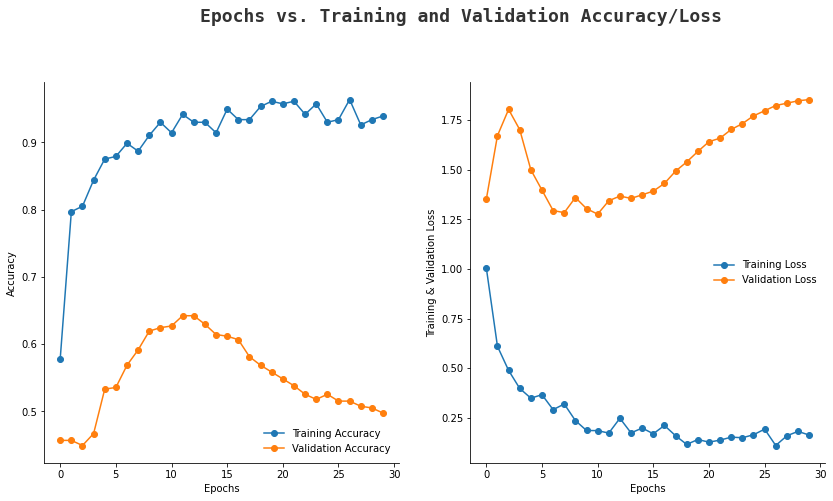

In [20]:
epochs = [i for i in range(30)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

# Tuning hyperparameter's

In [19]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [17]:
my_model = load_model("TestModel.hdf5")